In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from pandas.plotting import scatter_matrix as splom

In [319]:
data = pd.read_csv('diabetes/diabetic_data_balanced.csv')
print(data.readmitted.value_counts())
data.sample(10)

NO     3333
<30    3333
>30    3333
Name: readmitted, dtype: int64


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
7185,36055308,36125289,Caucasian,Female,[60-70),NaN,2,1,1,6,NaN,NaN,59,0,10,0,0,0,276,401,414,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
7180,36027852,23401674,Caucasian,Female,[70-80),NaN,5,3,17,5,NaN,Family/GeneralPractice,18,2,20,0,0,0,532,427,280,8,>200,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
9112,74248158,6798231,Caucasian,Male,[50-60),NaN,1,1,7,4,NaN,NaN,43,0,12,0,0,1,786,680,412,9,None,None,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,<30
6243,31270482,2970837,Caucasian,Male,[50-60),NaN,2,1,1,11,NaN,NaN,45,5,34,1,0,1,415,401,V15,6,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
9143,74985750,2971062,AfricanAmerican,Female,[50-60),NaN,1,1,7,5,NaN,InternalMedicine,52,0,8,0,0,0,434,295,569,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,<30
6892,34119018,1972350,AfricanAmerican,Male,[60-70),NaN,1,4,5,3,NaN,NaN,41,1,15,0,0,0,458,403,496,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
8561,62991174,20328678,NaN,Male,[70-80),NaN,2,18,1,5,NaN,NaN,50,6,19,0,0,0,447,444,250,6,None,None,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,<30
9313,78137598,199197,AfricanAmerican,Female,[70-80),NaN,1,2,7,14,NaN,NaN,55,6,41,0,0,0,162,196,493,9,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,<30
4707,25964118,9026046,Caucasian,Female,[50-60),NaN,2,2,20,11,NaN,NaN,49,0,12,0,0,4,295,288,560,9,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,<30
4055,23712366,435699,Hispanic,Male,[40-50),NaN,2,6,2,13,NaN,NaN,58,0,10,0,0,1,572,571,70,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 50 columns):
encounter_id                9999 non-null int64
patient_nbr                 9999 non-null int64
race                        9819 non-null object
gender                      9999 non-null object
age                         9999 non-null object
weight                      300 non-null object
admission_type_id           9999 non-null int64
discharge_disposition_id    9999 non-null int64
admission_source_id         9999 non-null int64
time_in_hospital            9999 non-null int64
payer_code                  235 non-null object
medical_specialty           6362 non-null object
num_lab_procedures          9999 non-null int64
num_procedures              9999 non-null int64
num_medications             9999 non-null int64
number_outpatient           9999 non-null int64
number_emergency            9999 non-null int64
number_inpatient            9999 non-null int64
diag_1                   

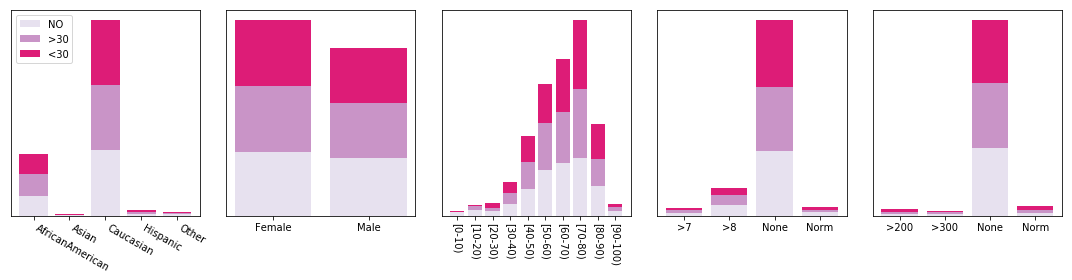

In [735]:
fig, axes = plt.subplots(1,5, figsize=(15, 4), sharey=False)

ethnicity_counts_lt = data.loc[data.readmitted == '<30'].race.value_counts().sort_index()
ethnicity_counts_gt = data.loc[data.readmitted == '>30'].race.value_counts().sort_index()
ethnicity_counts_no = data.loc[data.readmitted == 'NO'].race.value_counts().sort_index()
ethnicity_counts = ethnicity_counts_lt + ethnicity_counts_gt + ethnicity_counts_no
norm_eth  = ethnicity_counts.sum()
ethnicity_counts_gt /= norm_eth; ethnicity_counts_lt /= norm_eth; ethnicity_counts_no /= norm_eth
ethnicity_counts /= norm_eth
axes[0].bar(range(len(ethnicity_counts)), ethnicity_counts_no.values, fc='#e7e1ef', label='NO')
axes[0].bar(range(len(ethnicity_counts)), ethnicity_counts_gt.values, fc='#c994c7', label='>30', bottom=ethnicity_counts_no.values)
axes[0].bar(range(len(ethnicity_counts)), ethnicity_counts_lt.values, fc='#dd1c77', label='<30', bottom=ethnicity_counts_no.values+ethnicity_counts_gt)
axes[0].set_xticks(range(len(ethnicity_counts)))
axes[0].set_xticklabels(ethnicity_counts.keys(), horizontalalignment='left', rotation=-30)
axes[0].legend(loc='upper left')
gender_counts_lt = data.loc[data.readmitted == '<30'].gender.value_counts().sort_index()
gender_counts_gt = data.loc[data.readmitted == '>30'].gender.value_counts().sort_index()
gender_counts_no = data.loc[data.readmitted == 'NO'].gender.value_counts().sort_index()
gender_counts = gender_counts_lt + gender_counts_gt + gender_counts_no
norm_gen = gender_counts.sum()
gender_counts_gt /= norm_gen; gender_counts_lt /= norm_gen; gender_counts_no /= norm_gen
gender_counts /= norm_gen
axes[1].bar(range(len(gender_counts)), gender_counts_no.values, fc='#e7e1ef', label='NO')
axes[1].bar(range(len(gender_counts)), gender_counts_gt.values, fc='#c994c7', label='>30', bottom=gender_counts_no.values)
axes[1].bar(range(len(gender_counts)), gender_counts_lt.values, fc='#dd1c77', label='<30', bottom=gender_counts_no.values+gender_counts_gt)
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(gender_counts.keys())

age_counts_lt = data.loc[data.readmitted=='<30'].age.value_counts().sort_index()
age_counts_gt = data.loc[data.readmitted=='>30'].age.value_counts().sort_index()
age_counts_no = data.loc[data.readmitted=='NO'].age.value_counts().sort_index()
age_counts = age_counts_no + age_counts_gt + age_counts_lt
norm_age = age_counts.sum()
age_counts_gt /= norm_age; age_counts_lt /= norm_age; age_counts_no /= norm_age
age_counts /= norm_age
axes[2].bar(range(len(age_counts)), age_counts_no.values, fc='#e7e1ef', label='NO')
axes[2].bar(range(len(age_counts)), age_counts_gt.values, fc='#c994c7', label='>30', bottom=age_counts_no.values)
axes[2].bar(range(len(age_counts)), age_counts_lt.values, fc='#dd1c77', label='<30', bottom=age_counts_no.values+age_counts_gt.values)
axes[2].set_xticks(range(len(age_counts)))
axes[2].set_xticklabels(age_counts.keys(), rotation=-90)

a1c_counts_lt = data.loc[data.readmitted=='<30'].A1Cresult.value_counts().sort_index()
a1c_counts_gt = data.loc[data.readmitted=='>30'].A1Cresult.value_counts().sort_index()
a1c_counts_no = data.loc[data.readmitted=='NO'].A1Cresult.value_counts().sort_index()
a1c_counts = a1c_counts_no + a1c_counts_gt + a1c_counts_lt
norm_a1c = age_counts.sum()
a1c_counts_gt /= norm_a1c; a1c_counts_lt /= norm_a1c; a1c_counts_no /= norm_a1c
a1c_counts /= norm_a1c
axes[3].bar(range(len(a1c_counts)), a1c_counts_no.values, fc='#e7e1ef', label='NO')
axes[3].bar(range(len(a1c_counts)), a1c_counts_gt.values, fc='#c994c7', label='>30', bottom=a1c_counts_no.values)
axes[3].bar(range(len(a1c_counts)), a1c_counts_lt.values, fc='#dd1c77', label='<30', bottom=a1c_counts_no.values+a1c_counts_gt.values)
axes[3].set_xticks(range(len(a1c_counts)))
axes[3].set_xticklabels(a1c_counts.keys(), rotation=0)

glu_counts_lt = data.loc[data.readmitted=='<30'].max_glu_serum.value_counts().sort_index()
glu_counts_gt = data.loc[data.readmitted=='>30'].max_glu_serum.value_counts().sort_index()
glu_counts_no = data.loc[data.readmitted=='NO'].max_glu_serum.value_counts().sort_index()
glu_counts = glu_counts_no + glu_counts_gt + glu_counts_lt
norm_glu = glu_counts.sum()
glu_counts_gt /= norm_glu; glu_counts_lt /= norm_glu; glu_counts_no /= norm_glu
glu_counts /= norm_glu
axes[4].bar(range(len(glu_counts)), glu_counts_no.values, fc='#e7e1ef', label='NO')
axes[4].bar(range(len(glu_counts)), glu_counts_gt.values, fc='#c994c7', label='>30', bottom=glu_counts_no.values)
axes[4].bar(range(len(glu_counts)), glu_counts_lt.values, fc='#dd1c77', label='<30', bottom=glu_counts_no.values+glu_counts_gt.values)
axes[4].set_xticks(range(len(glu_counts)))
axes[4].set_xticklabels(glu_counts.keys(), rotation=0)

for ax in axes:
    ax.set_yticks([])
fig.tight_layout()

plt.show()

In [428]:
asians = data.loc[data.race == 'Asian']
print(len(asians), "Asians in the data set.")
for k, v in zip(asians.readmitted.value_counts().index, asians.readmitted.value_counts().values):
    print(k+":", v)
print()

latinx = data.loc[data.race == 'Hispanic']
print(len(latinx), "Hispanics in the data set.")
for k, v in zip(latinx.readmitted.value_counts().index, latinx.readmitted.value_counts().values):
    print(k+":", v)
print()

other = data.loc[data.race == 'Other']
print(len(other), "Others in the data set.")
for k, v in zip(other.readmitted.value_counts().index, other.readmitted.value_counts().values):
    print(k+":", v)
print()

black_counts = data.loc[data.race == "AfricanAmerican"].readmitted.value_counts()
print(black_counts / black_counts.sum())
white_counts = data.loc[data.race == "Caucasian"].readmitted.value_counts()
print(white_counts / white_counts.sum())

42 Asians in the data set.
<30: 16
NO: 14
>30: 12

195 Hispanics in the data set.
<30: 79
>30: 71
NO: 45

130 Others in the data set.
NO: 60
<30: 37
>30: 33

>30    0.357111
<30    0.328049
NO     0.314839
Name: readmitted, dtype: float64
NO     0.336026
<30    0.334912
>30    0.329063
Name: readmitted, dtype: float64


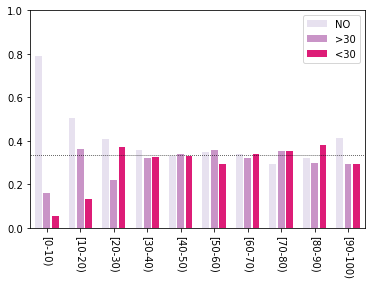

In [736]:
age_freqs = np.sum([age_counts_gt, age_counts_lt, age_counts_no], axis=0)
plt.bar(range(0,40,4), age_counts_no / age_freqs, color="#e7e1ef", label='NO')
plt.bar(range(1,40,4), age_counts_gt / age_freqs, color="#c994c7", label='>30')
plt.bar(range(2,40,4), age_counts_lt / age_freqs, color="#dd1c77", label='<30')
plt.xticks(range(1,40,4), age_counts_no.keys(), rotation=-90)
plt.plot([-5,41], [1/3, 1/3], 'k:', linewidth=0.75)
plt.ylim(0,1)
plt.xlim(-1,39)
plt.legend(loc='upper right')
plt.show()

In [413]:
distinct = len(data.diag_1.value_counts())
print("Number of distinct values for Diagnosis 1:", distinct)
print("Of these there was only one one instance of:", len(data.diag_1.value_counts().loc[data.diag_1.value_counts() == 1]))
total = data.diag_1.value_counts().sum()
tencommon = data.diag_1.value_counts()[:18].sum()

print(f"The 18 most common diagnoses make for {tencommon} out of {total} diagnoses. ({100*tencommon/total:.4}%)")
nums = []
percs = []
for i in range(1,5):
    num = data.diag_1.value_counts().value_counts().sort_index()[i]
    nums.append(num)
    perc = 100*i*num/total
    percs.append(perc)
    print(f"The diagnoses that were made only {i} times account for {num*i} out of {total} diagnoses. ({perc:.4}%)")
    print(f"This encompasses {num} distinct diagnoses, out of {distinct}. ({100*num/distinct:.3}%)")
    print()
print(f"Overall, the diagnoses that were made fewer than 5 times account for {100*sum(nums)/distinct:.3}% of the distinct values and {sum(percs):.3}% of all diagnoses.")

Number of distinct values for Diagnosis 1: 441
Of these there was only one one instance of: 112
The 18 most common diagnoses make for 5054 out of 9994 diagnoses. (50.57%)
The diagnoses that were made only 1 times account for 112 out of 9994 diagnoses. (1.121%)
This encompasses 112 distinct diagnoses, out of 441. (25.4%)

The diagnoses that were made only 2 times account for 108 out of 9994 diagnoses. (1.081%)
This encompasses 54 distinct diagnoses, out of 441. (12.2%)

The diagnoses that were made only 3 times account for 126 out of 9994 diagnoses. (1.261%)
This encompasses 42 distinct diagnoses, out of 441. (9.52%)

The diagnoses that were made only 4 times account for 100 out of 9994 diagnoses. (1.001%)
This encompasses 25 distinct diagnoses, out of 441. (5.67%)

Overall, the diagnoses that were made fewer than 5 times account for 52.8% of the distinct values and 4.46% of all diagnoses.


In [222]:
picks1 = data.diag_1.map(lambda x : x in data.diag_1.value_counts().loc[data.diag_1.value_counts() == 1].index)
picks2 = data.diag_1.map(lambda x : x in data.diag_1.value_counts().loc[data.diag_1.value_counts() == 2].index)
picks3 = data.diag_1.map(lambda x : x in data.diag_1.value_counts().loc[data.diag_1.value_counts() == 3].index)
picks4 = data.diag_1.map(lambda x : x in data.diag_1.value_counts().loc[data.diag_1.value_counts() == 4].index)
picks5 = data.diag_1.map(lambda x : x in data.diag_1.value_counts().loc[data.diag_1.value_counts() == 5].index)
picks = [picks1, picks2, picks3, picks4, picks5]

Diagnoses made 1 times
<30    27
>30    36
NO     49
Name: readmitted, dtype: int64

Diagnoses made 2 times
<30    38
>30    39
NO     31
Name: readmitted, dtype: int64

Diagnoses made 3 times
<30    35
>30    36
NO     55
Name: readmitted, dtype: int64

Diagnoses made 4 times
<30    34
>30    26
NO     40
Name: readmitted, dtype: int64

Diagnoses made 5 times
<30    25
>30    25
NO     20
Name: readmitted, dtype: int64



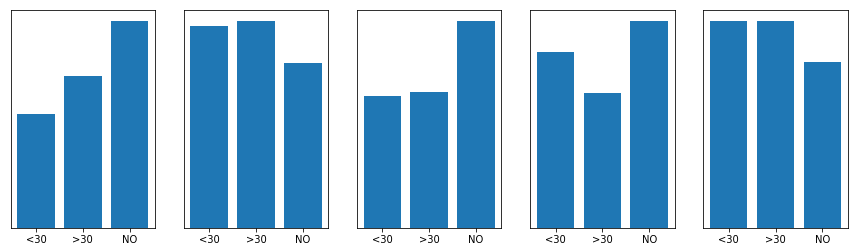

In [244]:
fig, axes = plt.subplots(1,5 , figsize=(15, 4))
axes = axes.reshape(-1)
for i, pick in enumerate(picks):          
    counts = data.loc[pick].readmitted.value_counts().sort_index()
    ax = axes[i]
    ax.bar([0,1,2], counts.values)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(counts.index)
    ax.set_yticks([])
    print(f"Diagnoses made {i+1} times")
    print(counts)
    print()
plt.show()    

Diag 1: 428
691 719 487 total: 1897
Total Variation Distance: 0.07661
Η: -1.565; ΔΗ: 0.02014

Diag 2: 250
470 541 703 total: 1714
Total Variation Distance: 0.07682
Η: -1.564; ΔΗ: 0.02063

Diag 3: 414
429 569 626 total: 1624
Total Variation Distance: 0.06917
Η: -1.568; ΔΗ: 0.01737

Diag 4: 401
348 390 488 total: 1226
Total Variation Distance: 0.06471
Η: -1.57; ΔΗ: 0.01462

Diag 5: 276
388 347 365 total: 1100
Total Variation Distance: 0.01939
Η: -1.583; ΔΗ: 0.001508

Diag 6: 427
328 293 322 total: 943
Total Variation Distance: 0.02262
Η: -1.583; ΔΗ: 0.001723

Diag 7: 496
229 197 190 total: 616
Total Variation Distance: 0.03842
Η: -1.58; ΔΗ: 0.004855

Diag 8: 250.01
200 210 203 total: 613
Total Variation Distance: 0.009244
Η: -1.585; ΔΗ: 0.0003024

Diag 9: 403
242 216 127 total: 585
Total Variation Distance: 0.1162
Η: -1.536; ΔΗ: 0.04905

Diag 10: 599
189 202 179 total: 570
Total Variation Distance: 0.02105
Η: -1.583; ΔΗ: 0.001768

Diag 11: 786
136 184 175 total: 495
Total Variation Dista

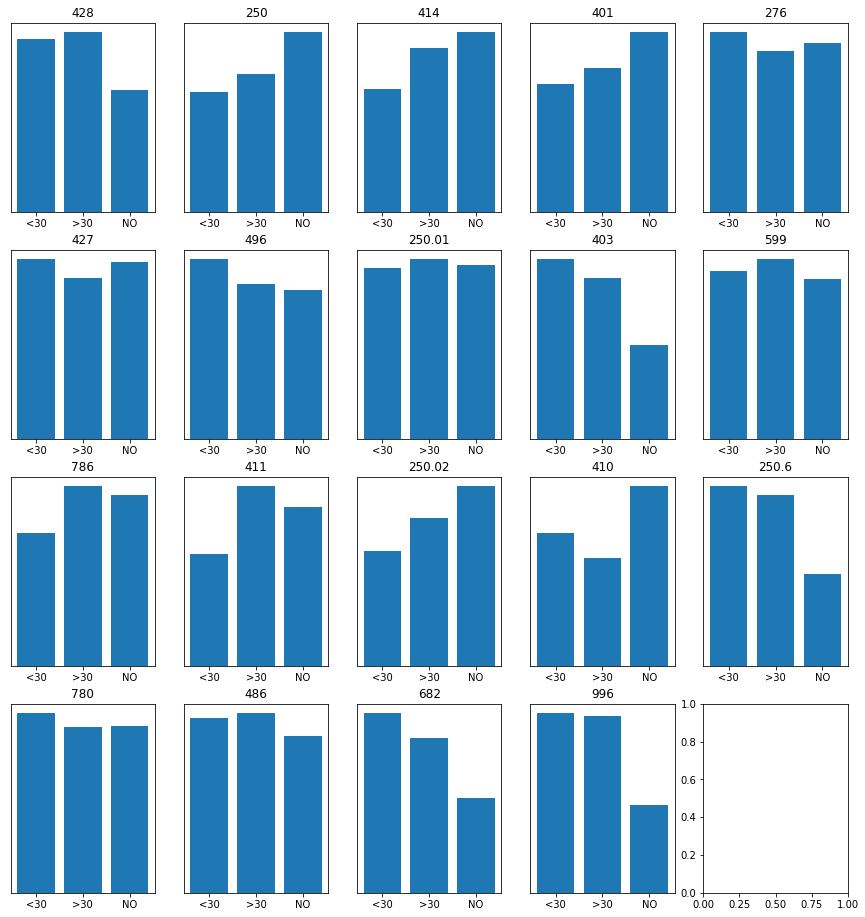

In [532]:
total_var = lambda counts: abs(np.array(counts / counts.sum()) - 1/3).sum() / 2
p = lambda counts: counts/counts.sum()
Η = lambda counts: np.log2(p(counts)) @ (p(counts))
Δ = lambda counts: Η(counts) + np.log2(3)

fig, axes = plt.subplots(4,5 , figsize=(15, 16))
axes = axes.reshape(-1)
ent_change = 0
for i, diag in enumerate(all_diags.value_counts().index[:19]):          # Consider the 19 most common diagnoses
    choices = map(any, zip(data.diag_1 == diag, data.diag_2 == diag, data.diag_3 == diag))
    counts = data.loc[choices].readmitted.value_counts().sort_index()
    ax = axes[i]
    ax.set_title(diag)
    ax.bar([0,1,2], counts.values)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(counts.index)
    ax.set_yticks([])
    print(f"Diag {i+1}:", diag)
    print(counts['<30'], counts['>30'], counts['NO'], f"total: {sum(counts)}")
    print(f"Total Variation Distance: {total_var(counts):.4}")
    print(f"Η: {Η(counts):.4}; ΔΗ: {Δ(counts):.4}")
    if Δ(counts) > Δ(np.array([1/3+0.1, 1/3-0.1, 1/3])):
        ent_change +=1
    print()
print(f"A total of {ent_change} of these diagnoses exhibit a change in entropy")

plt.show()

In [667]:
from tqdm import tqdm_notebook as tqdm
thresh_favours = dict([])

all_diags = data.diag_1.append(data.diag_2.append(data.diag_3))

for thresh in tqdm(np.linspace(0.05, 0.2, 50)):
    ent_change = 0
    tv_change = 0

    favours = dict([('none', 0)] + list(np.reshape([[(f'{v} {t}', [])] for v in ['favours', 'disfavours'] for t in ['NO', '>30', '<30']], (-1,2))))
    favours = dict([(k, []) for k,v in favours.items()])
    count = 0
    for i, diag in enumerate(all_diags.value_counts().index[all_diags.value_counts() >= 15]):# Consider the 10 most common diagnoses
        choices = map(any, zip(data.diag_1 == diag, data.diag_2 == diag, data.diag_3 == diag))
        counts = data.loc[choices].readmitted.value_counts().sort_index()    
        for t in ['NO', '>30', '<30']:
            if not (t in counts.index):
                counts = counts.append(pd.Series({t:0}))
        counts = counts.sort_index()
        tv = total_var(counts)
        delta = Δ(counts)
        if delta > Δ(np.array([1/3 + thresh, 1/3 - thresh/2, 1/3-thresh/2])):
            ent_change +=1
        if tv > thresh:
            tv_change +=1
            if (counts/counts.sum()-1/3 *np.ones(3)).idxmax() ==  np.abs((counts/counts.sum()-1/3 *np.ones(3))).idxmax():
                favours['favours '+counts.idxmax()].append(diag)
            else:
                favours[f'disfavours {counts.idxmin()}'].append(diag)
        else:
            favours['none'].append(diag)
        favours['none'].extend(all_diags.value_counts().index[all_diags.value_counts() < 15])
        count+=1
    print(f"A total of {ent_change} of the {count} diagnoses made at least 15 times exhibit a change in entropy")
    print(f"A total of {tv_change} of the {count} diagnoses made at least 15 times exhibit a change in tv distance")
    thresh_favours[thresh] = favours

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until


A total of 180 of the 213 diagnoses made at least 15 times exhibit a change in entropy
A total of 178 of the 213 diagnoses made at least 15 times exhibit a change in tv distance
A total of 178 of the 213 diagnoses made at least 15 times exhibit a change in entropy
A total of 177 of the 213 diagnoses made at least 15 times exhibit a change in tv distance
A total of 175 of the 213 diagnoses made at least 15 times exhibit a change in entropy
A total of 173 of the 213 diagnoses made at least 15 times exhibit a change in tv distance
A total of 175 of the 213 diagnoses made at least 15 times exhibit a change in entropy
A total of 171 of the 213 diagnoses made at least 15 times exhibit a change in tv distance
A total of 173 of the 213 diagnoses made at least 15 times exhibit a change in entropy
A total of 170 of the 213 diagnoses made at least 15 times exhibit a change in tv distance
A total of 168 of the 213 diagnoses made at least 15 times exhibit a change in entropy
A total of 166 of the 2

A total of 42 of the 213 diagnoses made at least 15 times exhibit a change in entropy
A total of 34 of the 213 diagnoses made at least 15 times exhibit a change in tv distance
A total of 40 of the 213 diagnoses made at least 15 times exhibit a change in entropy
A total of 32 of the 213 diagnoses made at least 15 times exhibit a change in tv distance
A total of 40 of the 213 diagnoses made at least 15 times exhibit a change in entropy
A total of 30 of the 213 diagnoses made at least 15 times exhibit a change in tv distance



In [694]:
impurities_fno = []
impurities_fgt = []
impurities_flt = []
impurities_dno = []
impurities_dgt = []
impurities_dlt = []
coverages = []
diags = list(zip(data.diag_1, data.diag_2, data.diag_3))

for thresh in tqdm(np.linspace(0.05, 0.2, 50)):
    diag_to_favour = dict([(diag, favour)  for favour, diagnoses in thresh_favours[thresh].items() for diag in diagnoses])
    prefs = list(map(lambda x: list(map(lambda y: diag_to_favour[y] , list(filter(lambda z: not type(z)==float, x)))), diags))
    def choices(gold):
        tmp = []
        for ps in prefs:
            votes, vote_counts = np.unique(ps, return_counts=True)
            tmp.append(votes[vote_counts.argmax()] == gold)
        return tmp
    nos = choices('favours NO')
    lts = choices('favours <30')
    gts = choices('favours >30')
    notnos = choices('disfavours NO')
    notlts = choices('disfavours <30')
    notgts = choices('disfavours >30')
    predictions_no = data.loc[nos].readmitted.value_counts()
    predictions_gt = data.loc[gts].readmitted.value_counts()
    predictions_lt = data.loc[lts].readmitted.value_counts()
    predictions_nno = data.loc[notnos].readmitted.value_counts()
    predictions_ngt = data.loc[notgts].readmitted.value_counts()
    predictions_nlt = data.loc[notlts].readmitted.value_counts()
    
    impurities_fno.append(1 - ((predictions_no/data.loc[nos].readmitted.value_counts().sum())**2).sum())
    impurities_fgt.append(1 - ((predictions_gt/data.loc[gts].readmitted.value_counts().sum())**2).sum())
    impurities_flt.append(1 - ((predictions_lt/data.loc[lts].readmitted.value_counts().sum())**2).sum())
    impurities_dno.append(1 - ((predictions_nno/data.loc[notnos].readmitted.value_counts().sum())**2).sum())
    impurities_dgt.append(1 - ((predictions_ngt/data.loc[notgts].readmitted.value_counts().sum())**2).sum())
    impurities_dlt.append(1 - ((predictions_nlt/data.loc[notlts].readmitted.value_counts().sum())**2).sum())
    if(impurities_dlt[-1] < 0):
        print(1-(predictions_lt/data.loc[notlts].readmitted.value_counts().sum())**2)
        print(data.loc[notlts].readmitted.value_counts().sum())
        print(predictions_)
    coverages.append(sum(map(sum, [predictions_no, predictions_gt, predictions_lt,predictions_nno, predictions_ngt, predictions_nlt]))/len(data))

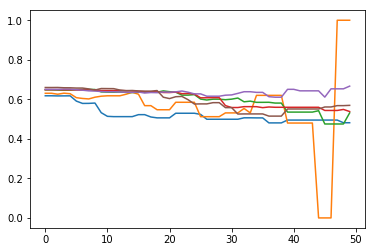

In [700]:
plt.plot(impurities_fno)
plt.plot(impurities_fgt)
plt.plot(impurities_flt)
plt.plot(impurities_dno)
plt.plot(impurities_dgt)
plt.plot(impurities_dlt)


In [692]:
1-((predictions_lt/data.loc[notlts].readmitted.value_counts().sum())**2).sum()

0.16666666666666663

In [555]:
all_diags = data.diag_1.append(data.diag_2.append(data.diag_3))
all_diags.value_counts()[int(len(all_diags.value_counts())/2.84):].sum() / all_diags.value_counts().sum()

0.050013462574044154

In [659]:
data.diag_3.value_counts()['V27']

6

In [582]:
a= zip(data.diag_1, data.diag_2, data.diag_3)
next(a)

('250.83', nan, nan)

In [612]:
l = [True, True, False]

In [613]:
np.unique(np.array(list(l), dtype=object), return_counts=True)

(array([False, True], dtype=object), array([1, 2]))

In [611]:
np.array(list(l), dtype=object)

array([], dtype=object)

In [623]:
np.isnan(np.nan)

True

In [628]:
list(filter(lambda z: not np.isnan(z), [1, 2, np.nan, 3]))

[1, 2, 3]

In [642]:
a = map(lambda x: map(lambda y: diag_to_favour[y], list(filter(lambda z: not type(z) == float, x))), diags)

In [643]:
list(filter(lambda z: not np.isnan(z), list(diags)[0]))

IndexError: list index out of range

In [641]:
type(np.nan)

float

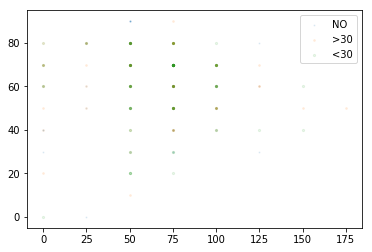

In [734]:
print(glu_counts)
print(glu_counts_lt)

[0-25)       0.067568
[100-125)    0.138514
[125-150)    0.023649
[150-175)         NaN
[175-200)         NaN
[25-50)      0.043919
[50-75)      0.293919
[75-100)     0.432432
Name: weight, dtype: float64
[0-25)       0.020270
[100-125)    0.060811
[125-150)    0.003378
[150-175)    0.006757
[25-50)      0.006757
[50-75)      0.128378
[75-100)     0.155405
Name: weight, dtype: float64
